Chapter 7
# 散点包络线
Book_2《可视之美》 | 鸢尾花书：从加减乘除到机器学习  

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import ConvexHull
import seaborn as sns 

In [2]:
def encircle(x,y, ax=None, **kw):
    if not ax: ax=plt.gca()
    p = np.c_[x,y]
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices,:], **kw)
    ax.add_patch(poly)

In [3]:
# 从seaborn中导入鸢尾花样本数据
iris_sns = sns.load_dataset("iris") 

iris_sns.head()
# 打印数据帧前5行

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
iris_sns.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

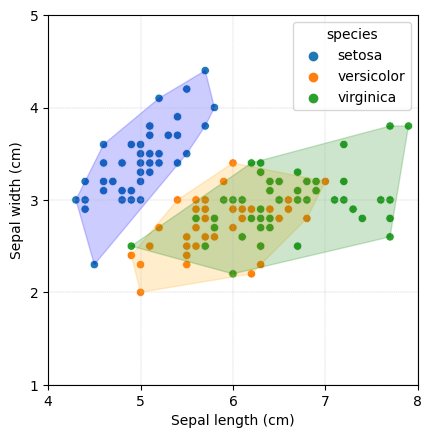

In [5]:
fig, ax = plt.subplots()

ax = sns.scatterplot(data=iris_sns, x="sepal_length", 
                     y="sepal_width", hue = "species")

# hue 用不同色调表达鸢尾花的类别
encircle(iris_sns.loc[iris_sns.species == 'setosa','sepal_length'].to_numpy(), 
         iris_sns.loc[iris_sns.species == 'setosa','sepal_width'].to_numpy(), 
         ec="blue", fc="blue", alpha=0.2)

encircle(iris_sns.loc[iris_sns.species == 'versicolor','sepal_length'].to_numpy(), 
         iris_sns.loc[iris_sns.species == 'versicolor','sepal_width'].to_numpy(), 
         ec="orange", fc="orange", alpha=0.2)

encircle(iris_sns.loc[iris_sns.species == 'virginica','sepal_length'].to_numpy(), 
         iris_sns.loc[iris_sns.species == 'virginica','sepal_width'].to_numpy(), 
         ec="green", fc="green", alpha=0.2)

ax.set_xlabel('Sepal length (cm)')
ax.set_ylabel('Sepal width (cm)')
ax.set_xticks(np.arange(4, 8 + 1, step=1))
ax.set_yticks(np.arange(1, 5 + 1, step=1))
ax.axis('scaled')
ax.grid(linestyle='--', linewidth=0.25, color=[0.7,0.7,0.7])
ax.set_xbound(lower = 4, upper = 8)
ax.set_ybound(lower = 1, upper = 5)
fig.savefig('散点包络线.svg')

参考：  
https://stackoverflow.com/questions/44575681/how-do-i-encircle-different-data-sets-in-scatter-plot/44577682#44577682